In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import cv2
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os
from os.path import isfile,join

In [3]:
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 'Classification of Human_CNN.ipynb',
 'Classification_CNN-Problem.ipynb',
 'Classification_CNN.ipynb',
 'crop_part1.tar.gz',
 'Documents',
 'envs',
 'face.py',
 'Face_Classification_CNN.ipynb',
 'human_class.h5',
 'image.py',
 'Input_Classification.ipynb',
 'prediction.py',
 'Untitled1.ipynb',
 'UTKFace',
 'UTKFace.tar.gz',
 'UTKFace_052021',
 'UTKFace_1',
 'UTKFace_2021']

In [4]:
path=r'C:\Users\sathe\Satheesh_SK\heart_disease'
os.chdir(r'C:\Users\sathe\Satheesh_SK\heart_disease')
os.chdir('UTKFace_052021')

In [5]:
image_files=os.listdir()

In [6]:
import cv2,imageio
images = []
ages = []
genders = []
for file in image_files:
    image = imageio.imread(file)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],3))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]))

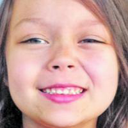

In [7]:
im=Image.open('10_1_0_20170103200654246.jpg.chip.jpg').resize((128,128))
im

Gender: 0 Age: 14


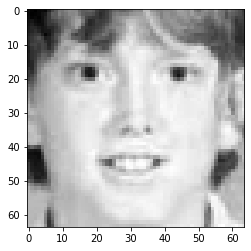

In [8]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 500
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

In [9]:
from PIL import Image

In [10]:
size=len(image_files)
size

23708

In [11]:
male=[i for i in image_files if int(i.split('_')[1])==1]
female= [i for i in image_files if int(i.split('_')[1])==0]

In [12]:
#import shutil
#newpath=r"C:\Users\sathe\Satheesh_SK\Human_Classification"+"FFemale"
#os.mkdir('MMale')
#for i in female:
    #shutil.move(i,newpath)

In [13]:
len(female),len(male)

(12391, 11317)

In [14]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

In [15]:
size=len(image_files)

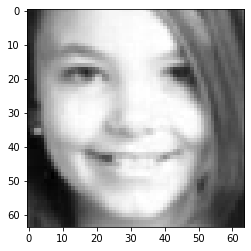

In [16]:
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],3),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [17]:
features.shape,target.shape

((23708, 64, 64, 3), (23708, 2))

In [18]:
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = (features[:15008],target[:15008]) , (features[15008:] , target[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.utils.np_utils import to_categorical

In [20]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(64,64,3)))
classifier.add(Conv2D(filters=64, kernel_size=2,padding='same',activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))

# Adding a second convolutional layer
classifier.add(Conv2D(filters=32,kernel_size=2,padding='same',activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))


# Adding a third convolutional layer
classifier.add(Conv2D(filters=16,kernel_size=2,padding='same',activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 2, activation = 'sigmoid'))

In [21]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [22]:
x_valid.shape,x_test.shape,x_train.shape

((7000, 64, 64, 3), (1700, 64, 64, 3), (15008, 64, 64, 3))

In [23]:
model=classifier.fit(x_train,
               y_train,
               batch_size=32,
               steps_per_epoch=1000,
               validation_steps=200,
               epochs=20,
               validation_data=(x_valid, y_valid))

Epoch 1/20
1000/1000 [==============================] - 432s 419ms/step - loss: 0.1202 - accuracy: 0.6612 - val_loss: 0.0892 - val_accuracy: 0.8452
Epoch 2/20
1000/1000 [==============================] - 427s 427ms/step - loss: 0.0798 - accuracy: 0.7994 - val_loss: 0.0667 - val_accuracy: 0.8753
Epoch 3/20
1000/1000 [==============================] - 450s 450ms/step - loss: 0.0672 - accuracy: 0.8317 - val_loss: 0.0601 - val_accuracy: 0.8767
Epoch 4/20
1000/1000 [==============================] - 590s 590ms/step - loss: 0.0630 - accuracy: 0.8408 - val_loss: 0.0557 - val_accuracy: 0.8916
Epoch 5/20
1000/1000 [==============================] - 585s 585ms/step - loss: 0.0594 - accuracy: 0.8521 - val_loss: 0.0544 - val_accuracy: 0.8925
Epoch 6/20
1000/1000 [==============================] - 588s 588ms/step - loss: 0.0571 - accuracy: 0.8539 - val_loss: 0.0531 - val_accuracy: 0.9000
Epoch 7/20
1000/1000 [==============================] - 595s 595ms/step - loss: 0.0552 - accuracy: 0.8639 - val_

In [24]:
val2_score=classifier.evaluate(x_test,y_test,verbose=0)
val2_score[1]

0.7394117712974548

In [26]:
classifier.save('multiclass_face.h5')

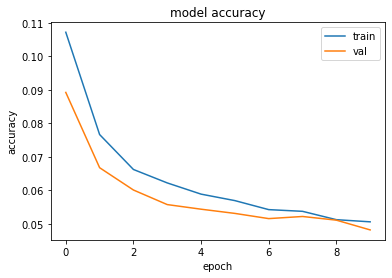

In [54]:
history = model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [29]:
yy[0][1],yy[1]

(0.62206876, array([0.5950342 , 0.05575472], dtype=float32))

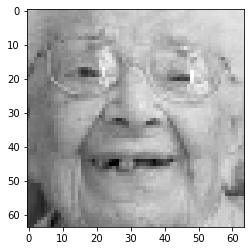

Actual Gender: Female Age: 105
Predicted Gender: Male Predicted Age: Young


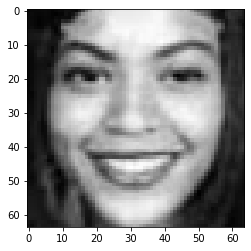

Actual Gender: Female Age: 16
Predicted Gender: Female Predicted Age: Young


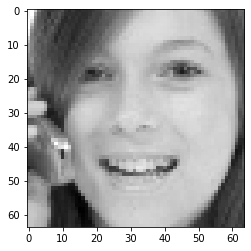

Actual Gender: Female Age: 16
Predicted Gender: Female Predicted Age: Young


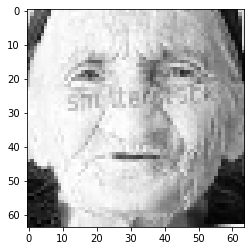

Actual Gender: Female Age: 100
Predicted Gender: Female Predicted Age: VeryOld


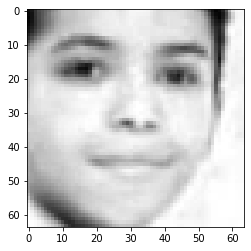

Actual Gender: Male Age: 10
Predicted Gender: Female Predicted Age: Young


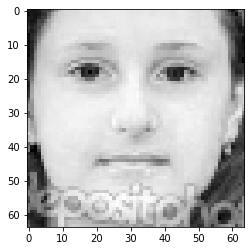

Actual Gender: Female Age: 11
Predicted Gender: Female Predicted Age: Young


In [53]:

def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
def age_group(age):
    if age > 0 and age < 10:
        return 1
    elif age > 10 and age <30:
        return 2
    elif age > 30 and age <50:
        return 3
    elif age > 50 and age <80:
        return 4
    else:
        return 4

def get_age(distr):
    distr = distr*4
    if distr <= 0.65: return "Child"
    if distr > 0.6  and distr <= 1.4:return "Adult"
    if distr >= 1.5 and distr <= 2.4:return "Young"
    if distr >= 2.5 and distr <= 3.4:return "MiddleAge"
    if distr >= 3.5 and distr <= 4.4:return "OldAge"
    return "VeryOld"
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    yy=classifier.predict(np.array([sample]))
    age = get_age(yy[0][0])
    gender = get_gender(yy[0][1])
    print("Predicted Gender:",gender,"Predicted Age:",age)
    
    
indexes = [15,1000,987,2,89,215]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)

In [38]:
yy=classifier.predict(np.array([sample]))
yy[0][0]

0.68155545